In [60]:
#Table 1. Households; Housing finance; Total housing; 
# By property purpose; New loan commitments; Values

# ABS Lending Indicators - Key Graphs

In [61]:
#Necessary packages
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import calendar
import math
from textwrap import wrap

from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

In [62]:
# The location


url = 'https://www.abs.gov.au/statistics/economy/finance/lending-indicators/mar-2024/560101.xlsx'

In [63]:
# Get the file
resp = requests.get(url)

In [64]:
# Open a new file to save down as
output = open('560101.xlsx', 'wb')
output.write(resp.content)
output.close()

In [65]:
dataSetLF = pd.read_excel('560101.xlsx', 'Data1');

In [66]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
current_date = now.strftime("%d-%m-%Y")
current_date_and_time = now.strftime("%H:%M:%S %d-%m-%Y")
#print("Graphs updated at " + current_time + " on " + current_date)
print("Graphs and data updated at " + current_time + " on " + current_date)


Graphs and data updated at 14:24:02 on 06-05-2024


In [67]:
metaDataDict = {}

for col in dataSetLF:
    #print('A new column')
    #print(col)
    unit = dataSetLF[col][0]
    #print(seasAdjust)
    seasAdjust = dataSetLF[col][1]
    #print(seasAdjust)
    dataType = dataSetLF[col][2]
    #print(dataType)
    frequency = dataSetLF[col][3]
    #print(frequency)
    collectionMonth = dataSetLF[col][4]
    #print(collectionMonth)
    startDate = dataSetLF[col][5]
    #print(startDate)
    endDate = dataSetLF[col][6]
    #print(endDate)
    numberObs = dataSetLF[col][7]
    #print(numberObs)
    seriesNumber = dataSetLF[col][8]
    #print(seriesNumber)
    
    dictName = seriesNumber
    
    seriesDict = {
    "seriesName" : col,
    "unit" : unit,
    "seriesType" : seasAdjust,
    "dataType" : dataType,
    "startDate" : startDate,
    "endDate" : endDate,
    "seriesNumber" : seriesNumber
    }
    
    #print(seriesNumber)
    
    metaDataDict[seriesNumber] = seriesDict
    

Series ID
A108295286C
A108299115J
A108276981A
A108299885C
A108271213V
A108294614K
A108296973X
A108268693J
A108273775J
A108277457X
A108284569X
A108292822T
A108284387K
A108292360K


In [68]:
# Name the columns after the ABS series ID and fix the date column

dataSetLF.columns = dataSetLF.iloc[8];

dataSetLF = dataSetLF[9:]

dataSetLF.columns = dataSetLF.columns.str.replace('Series ID', 'Date') #Rename the date column

#dataSetLF.head(10)


In [69]:
last_data = dataSetLF["Date"].iloc[-1]
print("Most recent data is for "+ calendar.month_name[last_data.month] 
      + " " + str(last_data.year))

Most recent data is for March 2024


In [70]:
def graph_series_abs(seriesCode, data, startDate, endDate, lastPointOption, metaData):
    
    metaData = metaDataDict[seriesCode]
    
    #print(metaData)
    
    seriesName = metaData.get('seriesName')
    #print(seriesName)
    
    #Get the data
    values = data[seriesCode]
    dates = data["Date"]
    

    
    #Filter to the desired date range
    mask = (data.loc[:,'Date'] > startDate) & (data.loc[:,'Date'] < endDate)
    dataToGraph = values.loc[mask]
    datesToGraph = dates.loc[mask]
    
    #Get range for vertical axis
    maxValue = max(dataToGraph)
    minValue = min(dataToGraph)
    difference = maxValue - minValue
    
    vertRangeUpper = math.ceil(maxValue + difference * .1)
    vertRangeLower = math.floor(minValue - difference * .1) 
    
    #print(vertRangeUpper)
    #print(vertRangeLower)
    
    #Only use years as labels on the horiztonal axis
    yearsToGraph = [date for date in datesToGraph if date.month == 1]
    
    #If more than 10 years, cuts the labelling and ticks down to every second year
    if len(yearsToGraph) > 12:
        yearsToGraph = [date for date in datesToGraph if date.month == 1 and (date.year % 2 == 0)]
    
    #Extract year labels
    yearsOnly = [date.year for date in yearsToGraph if date.month == 1 ]
    
    plt.rcParams.update({'font.size': 18})
    
    # Create a figure containing a single axes.
    fig, ax = plt.subplots(figsize=(10,8.5))  
    
    # Make the figure
    ax.plot(datesToGraph, dataToGraph, 'b', linewidth= '3')
    
    ax.axhline(y=0.0, color='black', linestyle='-', linewidth= '1')
    
    # Get the last data point for highlighting 
    lastData = dataToGraph.values[-1]
    lastDate = datesToGraph.values[-1]
    
    # X-ticks set as calculated above
    ax.set_xticks(yearsToGraph)
    
    # All graphs named by series plus per cent in subtitle (could be better)
    units = metaData.get('unit')
    seriesType = metaData.get('seriesType')
    ax.set_title("\n".join(wrap(seriesName + "\n" + seriesType + ", " + units , 60)))
    
    # X-axis labels are whole years only 
    ax.set_xticklabels(yearsOnly)
    
    ax.tick_params(labelleft=True, labelright=True)
                     #bottom=True, top=False, left=False, right=False)
    
    ax.set_ylim([vertRangeLower, vertRangeUpper])
    
    #Make the chart start show whole years only
    last_day_of_last_year = endDate.replace(month=12, day=31)    
    first_day_of_first_year = startDate.replace(month=1, day=1)
    ax.set_xlim([first_day_of_first_year, last_day_of_last_year])
    
    
    
    #Fonts
    
    #horizAxisStart = ax.get_xlim()[0]
    #print(horizAxisStart)
    #horizAxisEnd = ax.get_xlim()[1]
    #print(horizAxisEnd)
    #horizAxisLength = horizAxisEnd - horizAxisStart
    #print()
    
    #vertAxisStart = ax.get_ylim()[0]
    #print(vertAxisStart)
    #vertAxisEnd = ax.get_ylim()[1]
    #print(vertAxisEnd)
    #vertAxisLength = vertAxisEnd - vertAxisStart
    
    
    if lastPointOption:
        
        ax.plot(lastDate, lastData, 'r.', markersize= '10')
        
        lastDateMonth = calendar.month_name[lastDate.month] 
        
        unitForText = units
        if unitForText == "000":
            unitForText = " thousand"
        elif unitForText == "$ Millions":
            unitForText = "million"
        else:
            unitForText = " percent"
    
        #Add some metadata for the last datapoint
        textstr = "Lastest data point is " + str(round(lastData,2)) \
        + unitForText + " for \n" + calendar.month_name[lastDate.month] + " " + str(lastDate.year)
        props = dict(boxstyle='round', facecolor='none', alpha=0.5, edgecolor='none')
        ax.text(.01,.90, textstr, transform=ax.transAxes, fontsize=19,
            verticalalignment='top', horizontalalignment='left', bbox=props, color = 'red')

    filename = seriesName + str(startDate) + str(endDate) + ".jpg"
    #print(filename)
    plt.savefig(filename)

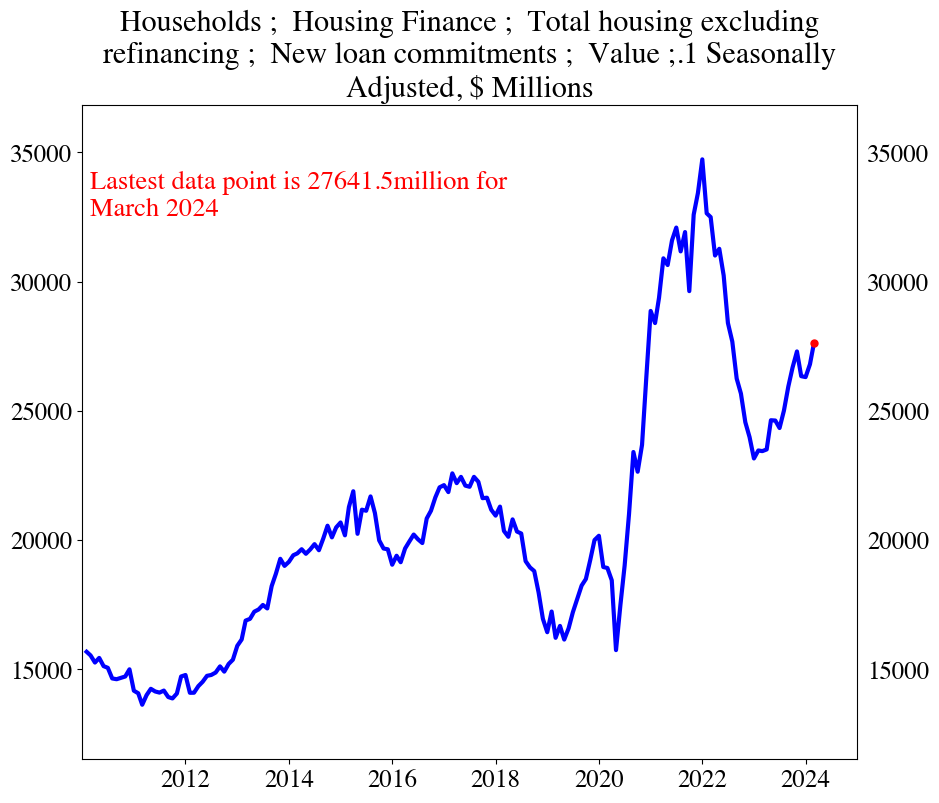

In [71]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108296973X'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

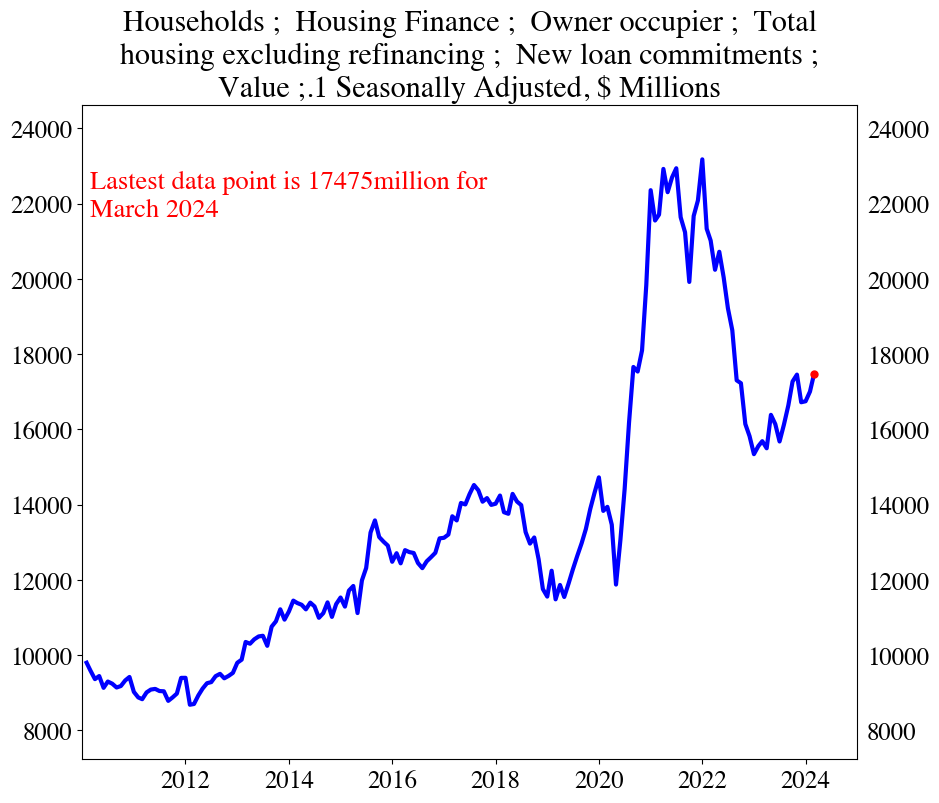

In [72]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108268693J'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

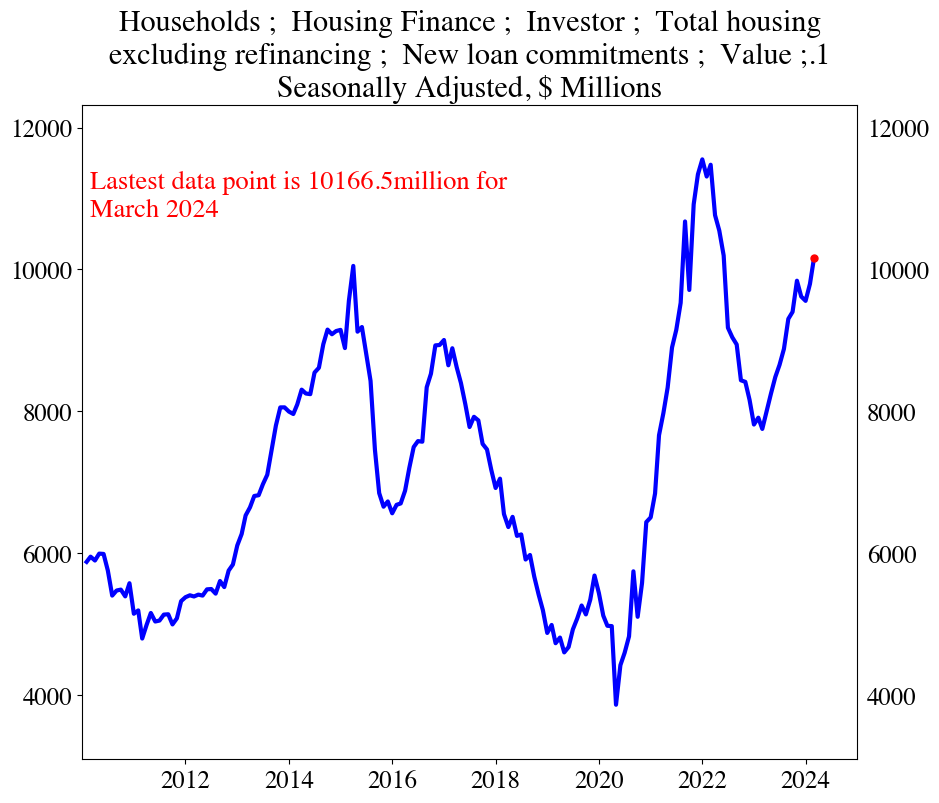

In [73]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108273775J'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

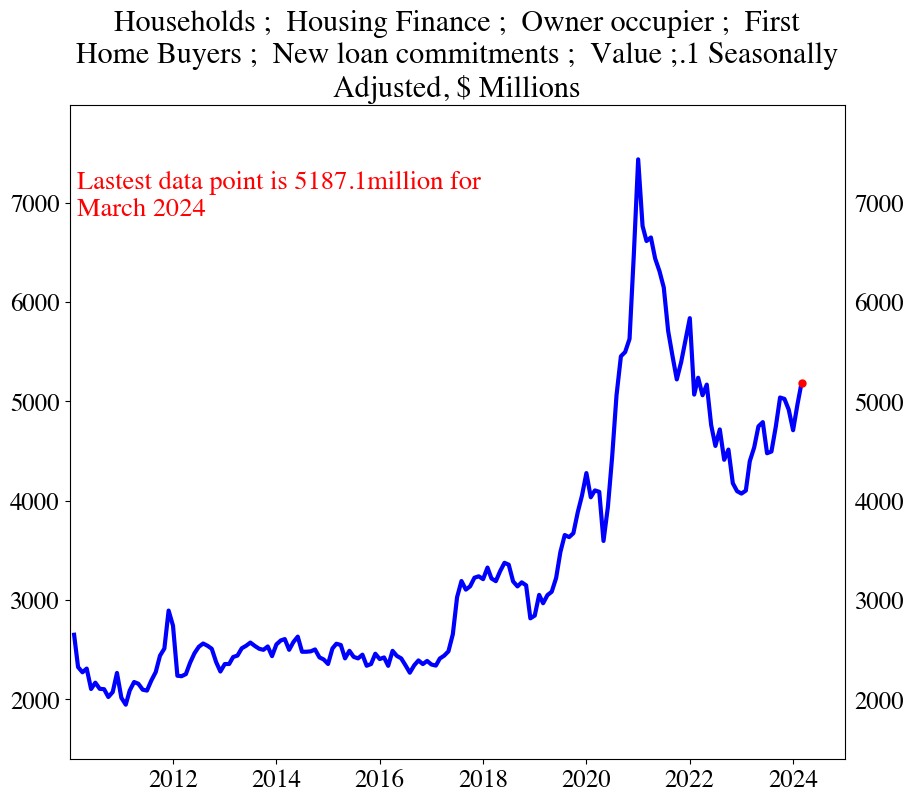

In [74]:
startDateExample = datetime(2010, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A108277457X'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

